오늘의 복습용 문제

1. l = list of list of .... 를 받아서, 하는 함수 get_shape를 작성하세요.
  - 여기서 torch.tensor(l).shape 과 같은 값을 가지는 리스트를 반환
  - 만약 torch.tensor가 불가능하다면 False를 리턴
2. l = list of list of ..., r = list of list of ... 두 input을 받아서, 아래와 같이 동작하는 함수 broadcasting을 작성하세요
  - 브로드캐스팅이 될 때 각 l, r이 바뀌어야 하는 형태를 리턴
  - 브로드캐스팅이 되지 않으면 False를 리턴

[[1,2,3], [1,2]]

In [114]:
def get_shape(lst):
    res = []
    cur = lst

    while isinstance(cur, list):
        res.append(len(cur))
        cur = cur[0]

    return res

def get_shape(lst):
    if not isinstance(lst, list):
        return []
    else:
        shapes = []
        for elem in lst:
            shape = get_shape(elem)
            if shape not in shapes:
                shapes.append(shape)
        if len(shapes) == 1:
            return [len(lst)] + get_shape(lst[0])
        else:
            return False

def fill(l, r):
    """If len(l) > len(r), fill 1 to r's front, so that len(l) == len(r),
    If len(r) < len(l), do the opposite.
    """
    if len(l) > len(r):
        diff = len(l) - len(r)
        r = [1 for _ in range(diff)] + r
        return l, r
    elif len(l) < len(r):
        diff = len(r) - len(l)
        l = [1 for _ in range(diff)] + l
        return l, r
    return l, r

def expand_dimension(l, dim_idx, r_s):
    """
    l = [[1,2,3,]] (shape 1, 3)
    dim_idx = 0
    r_s = 4
    expand_dimension(l, 0, 4)
    >> [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]

    l = [[[1,2,3]], [[1,2,3]], [[1,2,3]]] (shape 3, 1, 3 -> 3, 2, 3)
    l[0] = [[1,2,3]], l[1], l[2] (shape 2, 3)
    dim_idx = 1
    r_s = 2
    expand_dimension(l, 0, 2)
    >> [[[1,2,3], [1,2,3]], [[1,2,3], [1,2,3]], [[1,2,3], [1,2,3]]] (shape 3, 2, 3)

    l / shape 4, 3, 2, 1, 2 -> 4, 3, 2, 5, 2
    expand_dimension(l, 3, 5)
    l[0], l[1], l[2], l[3] / shape 3, 2, 1, 2 -> 3, 2, 5, 2
    expand_dimension(l[0], 2, 5)
    expand_dimension(l[1], 2, 5)
    expand_dimension(l[2], 2, 5)
    expand_dimension(l[3], 2, 5)
    """
    assert get_shape(l)[dim_idx] == 1, (get_shape(l), dim_idx)

    if dim_idx == 0:
        return [l[0] for _ in range(r_s)]
    else:
        return [expand_dimension(e, dim_idx - 1, r_s) for e in l]


def broadcasting(l, r):
    shape_l = get_shape(l)
    shape_r = get_shape(r)

    assert shape_l and shape_r

    # 차원의 맞추기: 두 텐서의 차원(Dimension) 수가 다를 때,
    # 차원이 작은 텐서의 앞쪽에 1을 추가하여 차원을 맞춥니다.

    # (2, 3) / (4, 5, 2, 3) -> (1, 1, 2, 3) / (4, 5, 2, 3)

    l_is_bigger = False
    r_is_bigger = False
    diff = abs(len(shape_l) - len(shape_r))

    if len(shape_l) > len(shape_r):
        l_is_bigger = True
    elif len(shape_l) < len(shape_r):
        r_is_bigger = True

    shape_l, shape_r = fill(shape_l, shape_r)

    for _ in range(diff):
        if l_is_bigger:
            r = [r]  # r.shape: a1, a2, ... , an / [r].shape : 1, a1, a2, ... , an
        elif r_is_bigger:
            l = [l]

    assert shape_l == get_shape(l)
    assert shape_r == get_shape(r)

    # 크기 맞추기: 각 차원에서 크기가 1인 텐서는
    # 해당 차원의 크기를 큰 텐서의 크기에 맞춰 늘릴 수 있습니다.

    dim_idx = 0

    for l_s, r_s in zip(shape_l, shape_r):
        if l_s != r_s:
            if min(l_s, r_s) == 1:
                if l_s == 1: #
                    l = expand_dimension(l, dim_idx, r_s)
                else: # r_s == 1
                    r = expand_dimension(r, dim_idx, l_s)
            else:
                return False
        dim_idx += 1

    return l, r

l = [[[1,2,3]], [[1,2,3]], [[1,2,3]]]
print(get_shape(l))

r = [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]
print(get_shape(r))

# 3 1 3 / 4 3 -> 3 1 3 / 1 4 3 -> 3 1 3 / 3 4 3 -> 3 4 3 / 3 4 3
# r = [[[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]]
r_ans = [[
            [1,2,3,],
            [1,2,3,],
            [1,2,3,],
            [1,2,3,]
          ],
         [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]],
         [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]]
l_ans = [[[1,2,3], [1,2,3], [1,2,3], [1,2,3]],
         [[1,2,3], [1,2,3], [1,2,3], [1,2,3]],
         [[1,2,3], [1,2,3], [1,2,3], [1,2,3]]]
l, r = broadcasting(l, r)
print(get_shape(l), get_shape(r))
print(l_ans == l, r_ans == r)

[3, 1, 3]
[4, 3]
[3, 4, 3] [3, 4, 3]
True True


ap?

### Pytorch 설치 및 확인

매번 설치/확인 다시 해줘야 합니다.


In [1]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.4.1+cpu
False


### 데이터 업로드

다음 파일을 다운로드합니다.

https://download.pytorch.org/tutorial/data.zip

어떤 형식으로 데이터가 저장되어 있는지 한번 열어서 읽어보세요.

왼쪽 바 폴더모양 (files) 클릭 후 코랩에서 쓸 수 있도록 언어별 이름 데이터를 업로드해주세요.

`names/` 폴더를 만든 후 그 안에 집어넣습시다.

텍스트 파일을 클릭해서 정상적으로 업로드 되었는지 내용을 확인합니다.


### `glob`으로 데이터 읽기

`glob`은 패턴 매칭을 통해 디스크에 어떤 파일이 있는지 파일명을 읽어옵니다.

우리가 사용할 데이터 목록인 18개 국어 각각의 파일명을 읽어옵시다.

이후 파이썬 내장 파일 입출력 기능으로 파일을 읽어옵시다.

읽어온 데이터는 다음 변수에 저장해둡시다.

모든 이름은 알파벳 소문자만 사용해서 저장해둡시다.

`category_names: dict[str, list[str]]`

`all_categories: list[str]`

In [100]:
import glob
import string

files = glob.glob('./data/names/*.txt')
assert len(files) == 18
print(files)

category_names = {} # category_names: dict[str, list[str]]
all_categories = [] # all_categories: list[str]
all_letters = string.ascii_lowercase
n_letters = len(all_letters)

for file in files:
    with open(file) as f:
        names = f.read().strip().split('\n')

    lang = file.split('/')[-1].split('.')[0].split('\\')[1]
    all_categories.append(lang)

    names = list(map(lambda n:n.lower(), names))
    names = [''.join([c for c in n if c in all_letters]), names] # Ignore non-alphabet letters
    category_names[lang] = names

    print(f'{lang}: {len(names)} |', names[0], names[1], names[2])
print(all_categories)
print(category_names,sep='\n')
n_categories = len(all_categories)

['./data/names\\Arabic.txt', './data/names\\Chinese.txt', './data/names\\Czech.txt', './data/names\\Dutch.txt', './data/names\\English.txt', './data/names\\French.txt', './data/names\\German.txt', './data/names\\Greek.txt', './data/names\\Irish.txt', './data/names\\Italian.txt', './data/names\\Japanese.txt', './data/names\\Korean.txt', './data/names\\Polish.txt', './data/names\\Portuguese.txt', './data/names\\Russian.txt', './data/names\\Scottish.txt', './data/names\\Spanish.txt', './data/names\\Vietnamese.txt']


NameError: name 'n' is not defined

### 데이터 전처리

각 이름을 텐서로 변환하는 방법입니다. 알단은 변환 함수만 정의해둡니다.

하나의 알파벳 문자를 "one-hot vector" 방식으로 표상합시다. 보다 구체적으로는 다음과 같습니다.

```
a -> <1 0 0 0 ... 0>
b -> <0 1 0 0 ... 0>
...
z -> <0 0 0 0 ... 1>
```

문자 하나가 아닌 단어 하나는 (line_length, n_letters)이라는 shape를 갖는 텐서로 변환됩니다.


In [95]:
import string
def letter2tensor(letter):
    [(res:=[1 if i==x else 0 for x in range(26)]) for i,j in enumerate(string.ascii_lowercase) if j==letter]
    return torch.tensor(res)

z_tensor = letter2tensor('z')
print(z_tensor.shape) # (26,1)
print(z_tensor)
# a_tensor = torch,tensor([1,0,...,0])

def word2tensor(word):
    res = torch.zeros(len(word), 1, len(all_letters))
    for idx, char in enumerate(word):
        res[idx] = letter2tensor(char)
    return res.squeeze(dim=1)
print(word2tensor('abc').shape)

torch.Size([26])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1])
torch.Size([3, 26])


In [96]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter.lower())

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), n_letters)
    for li, letter in enumerate(line):
        tensor[li][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('c'))

print(lineToTensor('cat').size())

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])
torch.Size([3, 26])


### Softmax



In [103]:
import torch

aaa = torch.randn(18)
print(aaa)
print(torch.softmax(aaa, -1))
print(torch.sum(torch.softmax(aaa, -1)))
torch.tensor([0, 1, 0, 0])

tensor([ 0.2241,  0.2620,  0.0360,  0.1562,  0.6531, -1.0200, -1.0225,  0.0492,
         0.0819,  0.0836,  0.4474,  0.4891, -0.6982, -1.2991, -0.2002,  0.1249,
        -0.2900, -1.3021])
tensor([0.0713, 0.0740, 0.0590, 0.0666, 0.1094, 0.0205, 0.0205, 0.0598, 0.0618,
        0.0619, 0.0891, 0.0929, 0.0283, 0.0155, 0.0466, 0.0645, 0.0426, 0.0155])
tensor(1.)


tensor([0, 1, 0, 0])

softmax 레이어를 통과하면, 어떠한 값이든 확률 값으로 변하게 됩니다.

위 예시 코드에서, 랜덤 값인 `aaa`가 softmax 레이어를 통과했더니 확률값으로 변화했다는 점을 관찰하세요. 입력값인 원래의 `aaa`에 저장되어 있던 값이 더 클수록 더 큰 확률값으로 변하게 됩니다. 이 값이 확률값이라는 점은 더했을 때 1이 된다는 점에서 알 수 있습니다.

신경망의 마지막 레이어의 값을 해석하기 위하여, 보통 마지막 레이어에 softmax를 넣어두는 경우가 많습니다.

### `dim` parameter (optional)

본 섹션은 어렵지만 중요한 내용을 다룹니다. `torch.sum`, `torch.max` 등 수많은 함수에서 똑같이 사용되는 내용입니다. Softmax를 예시로 들어 설명하겠습니다.

`torch.softmax(aaa, -1)`에서 적용할 `-1`은 텐서 차원의 인덱스입니다. 이 값을 이해하기 위해 예시를 들겠습니다.

예를 들어, shape가 (2, 3)인 텐서에 softmax를 적용하고 싶다면 어떻게 해야 할까요?

```
mat =
[[231, 252, 419]
 [434, 593, 321]]
(예시를 위한 랜덤값입니다)
```

각 행마다 softmax를 적용해서 각 행의 합을 1로 만들 수도 있고 (이렇게 하면 행렬 원소의 총 합은 2가 됩니다) 각 열마다 softmax를 적용해서 각 열의 합을 1으로 만들 수도 있습니다 (이렇게 하면 행렬 원소의 총 합은 3이 됩니다).

각 행마다 softmax를 적용하고 싶으면 `torch.softmax(mat, 1)`라고 코딩하면 되고, 각 열마다 softmax를 적용하고 싶으면 `torch.softmax(mat, 0)` 이라고 코딩하면 됩니다. 마지막 인덱스를 `-1`로 쓸 수 있으므로, `1`대신 `-1`이라고 해도 됩니다.

**Challenge**
- 3차원 이상의 텐서의 경우 어떤 식으로 해야할지, 잘 생각해보시고, 구현하여 본인 생각이 맞는지 확인해보세요.
- https://medium.com/analytics-vidhya/an-intuitive-understanding-on-tensor-sum-dimension-with-pytorch-d9b0b6ebbae
- https://jamesmccaffrey.wordpress.com/2020/07/09/understanding-the-dim-parameter-in-pytorch-functions/

### RNN 네트워크 구조

다음과 같이 `nn.Module`을 상속하여 PyTorch의 신경망을 클래스로 정의할 수 있습니다. 네트워크 구조가 어떻게 코드로 구현되는지 잘 살펴보세요.

**Quiz**
- `nn.Linear`는 몇 개의 parameter를 가지고 있을까요?
- 입력 텐서의 shape가 (x, x, x) 일 때, `nn.Linear(x, y)`를 거치면 어떻게 될까요? (직접 해보세요)
- `nn.LogSoftmax`는 몇 개의 parameter를 가지고 있을까요?


torch.Size([1, 18])
tensor(0)
['./data/names\\Arabic.txt', './data/names\\Chinese.txt', './data/names\\Czech.txt', './data/names\\Dutch.txt', './data/names\\English.txt', './data/names\\French.txt', './data/names\\German.txt', './data/names\\Greek.txt', './data/names\\Irish.txt', './data/names\\Italian.txt', './data/names\\Japanese.txt', './data/names\\Korean.txt', './data/names\\Polish.txt', './data/names\\Portuguese.txt', './data/names\\Russian.txt', './data/names\\Scottish.txt', './data/names\\Spanish.txt', './data/names\\Vietnamese.txt']
0.0010869554243981838
0.0002992897352669388
0.0013681822456419468
0.0005367745761759579
0.00023922442051116377
0.00013696208770852536
7.652943895664066e-05
4.31528314948082e-05
1.4662635294371285e-05
1.0251946150674485e-05
7.271740287251305e-06
5.125986263010418e-06
3.2186455882765586e-06
2.50339189733495e-06
1.1920922133867862e-06
7.152555099310121e-07
3.576278118089249e-07
2.3841855067985307e-07
1.1920928244535389e-07
1.1920928244535389e-07


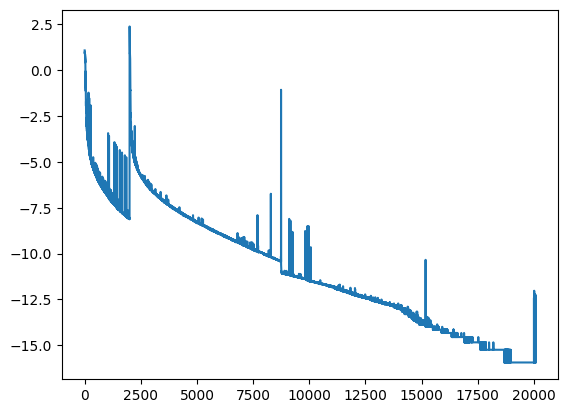

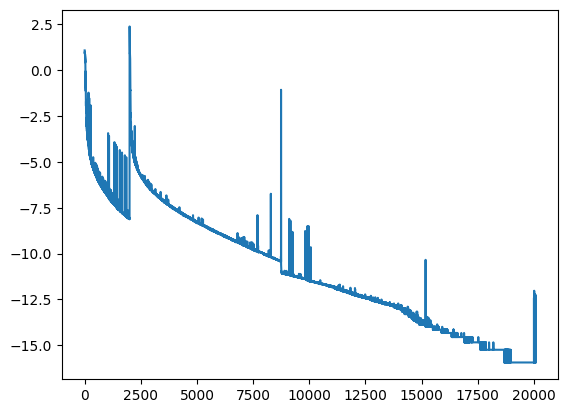

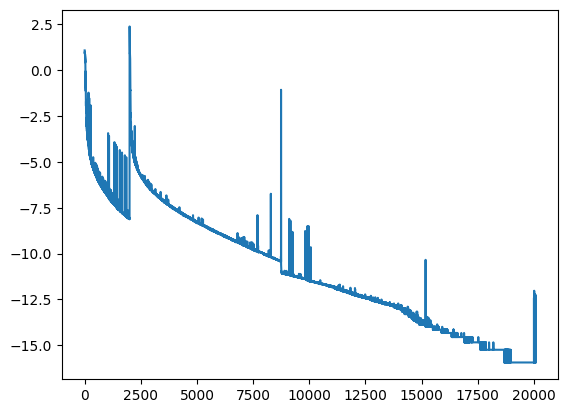

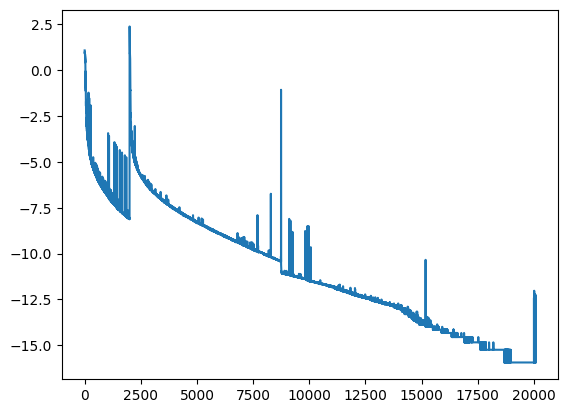

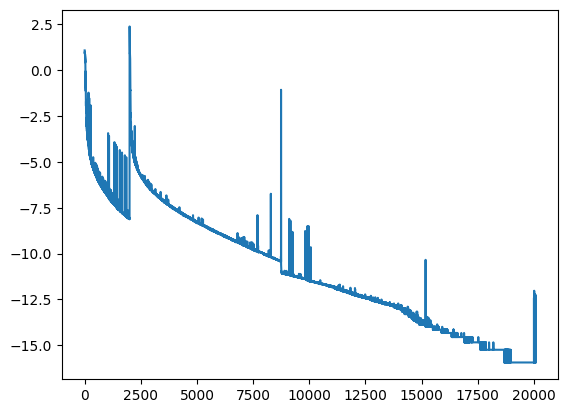

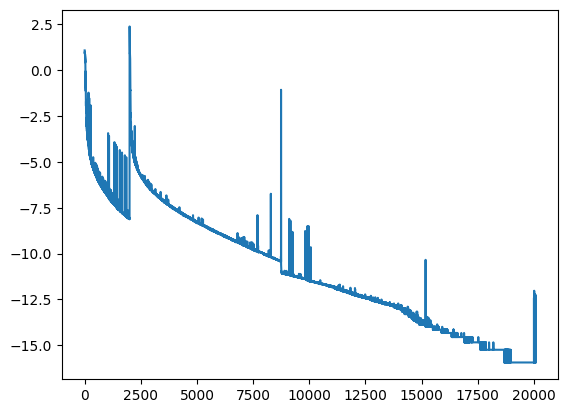

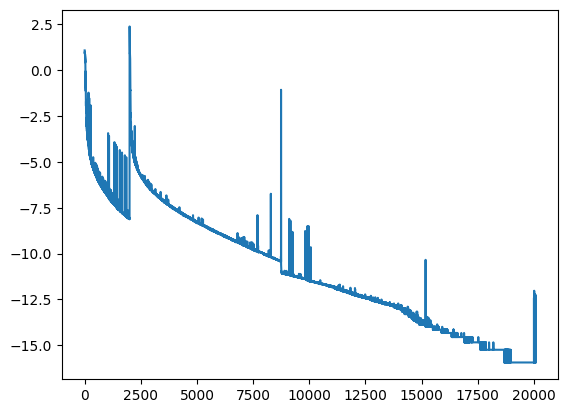

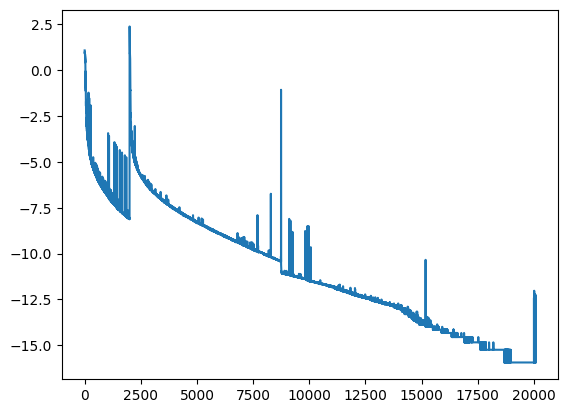

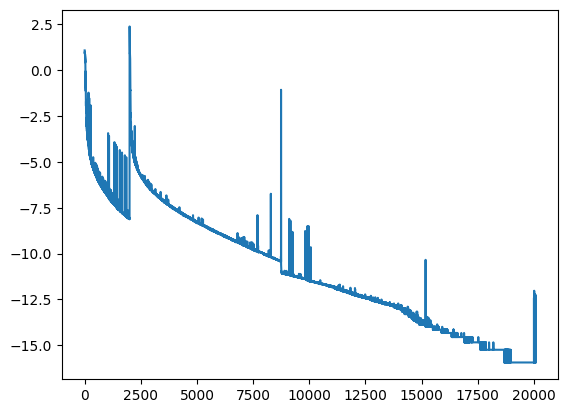

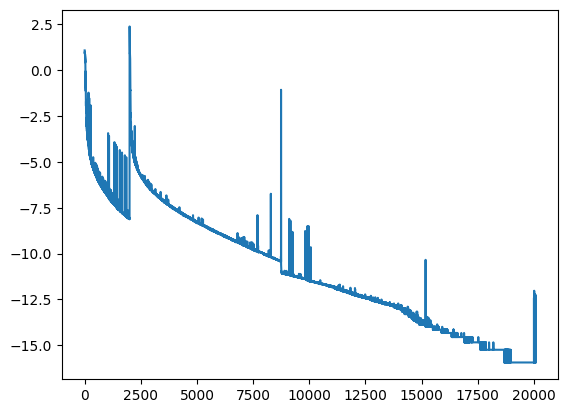

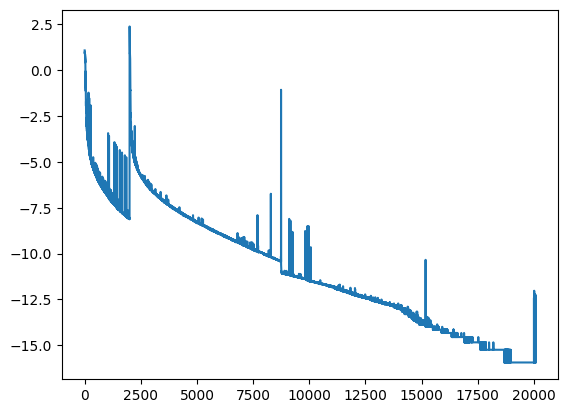

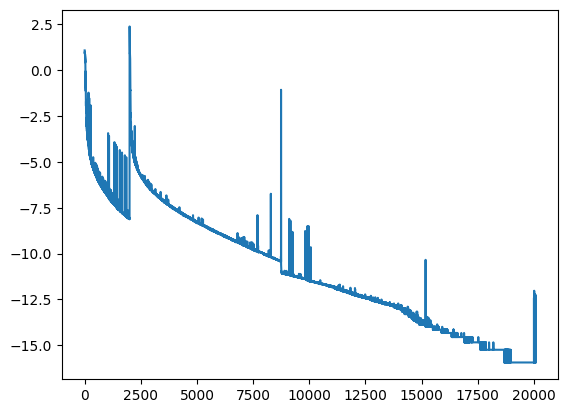

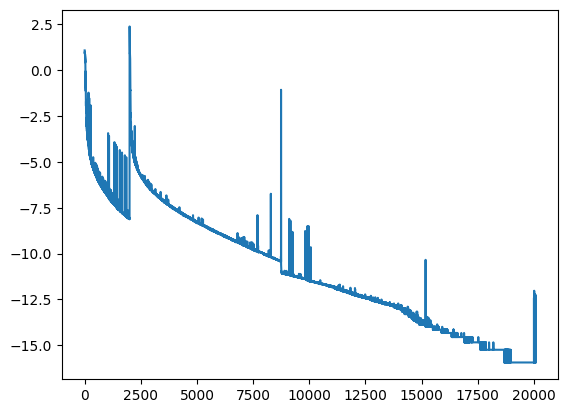

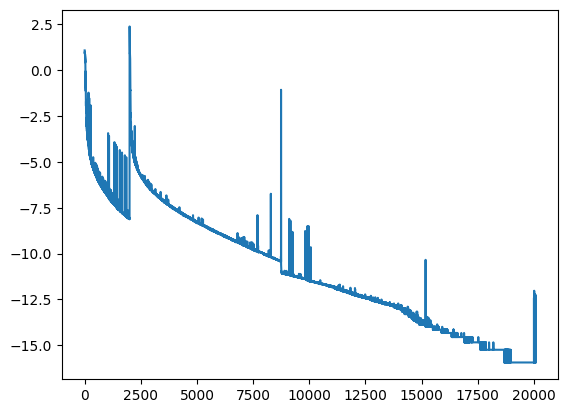

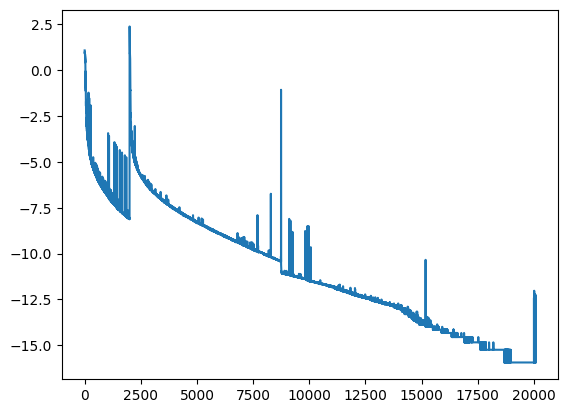

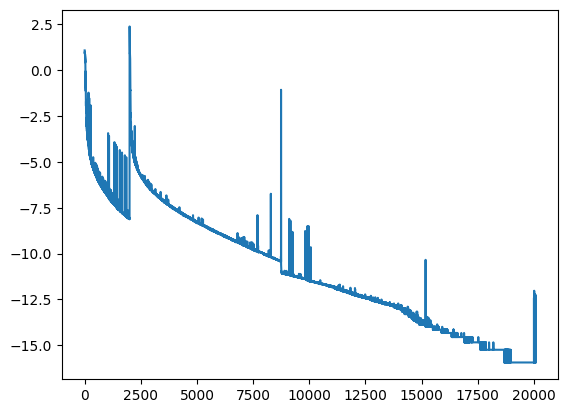

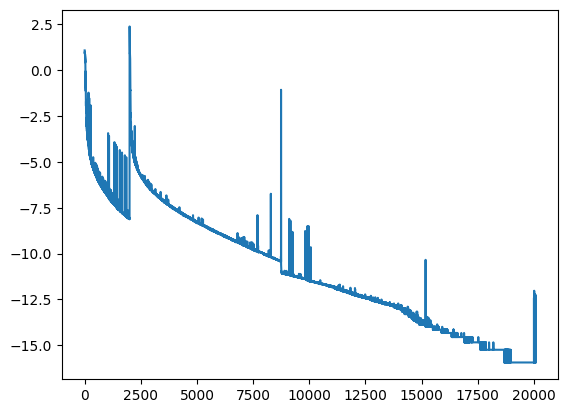

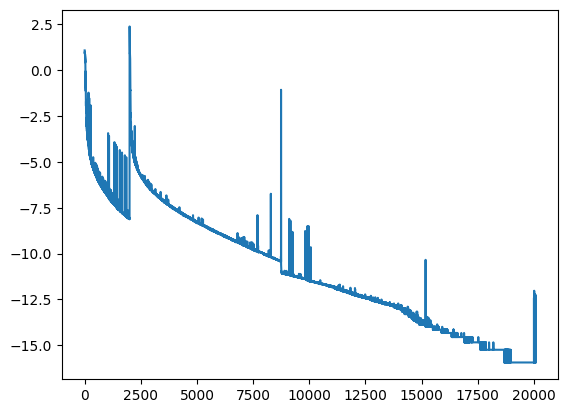

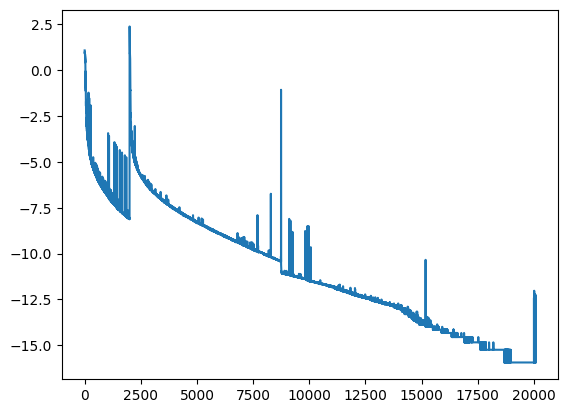

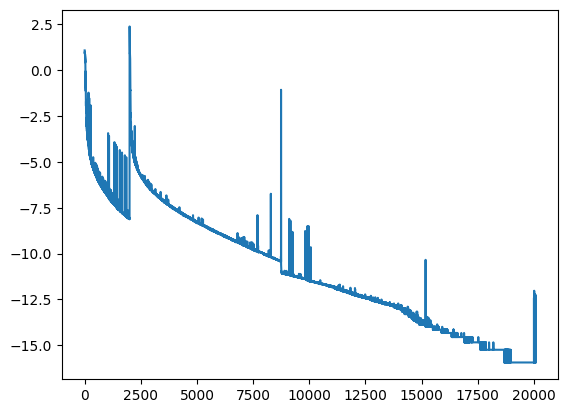

1


In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import random
import glob

all_letters = 'abcdefghijklmnopqrstuvwxyz'

def letter2tensor(letter):
    res = []

    for char in all_letters:
        if char == letter:
            res.append(1)
        else:
            res.append(0)
    return torch.tensor([res])

def idx2tensor(idx, N):
    res = []

    for i in range(N):
        if i == idx:
            res.append(1)
        else:
            res.append(0)

    return torch.tensor(res)

def word2tensor(word):
    res = torch.zeros(len(word), 1, len(all_letters))

    for idx, char in enumerate(word):
        res[idx] = letter2tensor(char)

    return res.squeeze(dim = 1)

def prepare_data(batch_size = 32):
    files = glob.glob('./data/names/*.txt')
    assert len(files) == 18
    print(files)

    category_names = {}
    all_categories = []

    n_letters = len(all_letters)
    assert n_letters == 26

    for file in files:
        with open(file) as f:
            names = f.read().strip().split('\n')

        lang = file.split('/')[-1].split('.')[0]
        all_categories.append(lang)

        names = [n.lower() for n in names] # Make everything lowercases
        names = [''.join([c for c in n if c in all_letters]) for n in names] # Ignore non-alphabet letters
        category_names[lang] = names

        # print(f'{lang}: {len(names)} |', names[0], names[1], names[2])

    n_categories = len(all_categories)
    x = []
    y = []
    for lang, names in category_names.items():
        for name in names:
            x.append(word2tensor(name)) # word_length (= len(name)) X number_of_characters (= len(all_letters))
            y.append(idx2tensor(all_categories.index(lang), len(all_categories))) # number_of_languages (= len(all_categories))

    # dataset = TensorDataset(torch.stack(x), torch.stack(y))
    # dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

    return zip(x, y)

def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.show()


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim = 0)
        self.optimizer = optim.Adam
        self.loss = torch.nn.NLLLoss()

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        # print('after h2o', output.shape)
        output = self.softmax(output)
        # print('after softmax', output.shape)

        return output, hidden

    def initHidden(self):
        return torch.zeros(self.hidden_size)

    def train_model(self, train_data, learning_rate = 0.001, epochs = 20):
        optimizer = self.optimizer(self.parameters(), lr = learning_rate)
        loss_history = []

        for epoch in range(epochs):
            for x, y in train_data:
                hidden = self.initHidden()

                for char in x:
                    output, hidden = self(char, hidden)
                    # print(output.shape)

                # print(output.shape, y.shape, x.shape)

                loss = self.loss(output, y)
                loss_history.append(torch.log(torch.mean(loss)).item())
                # print(torch.mean(loss).item())

                if len(loss_history) % 1000 == 0:
                    print(torch.mean(loss).item())
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            plot_loss_history(loss_history)
        return loss_history

def predict_nationality(model, word):
    hidden = model.initHidden()

    for char in word:
        letter_tensor = letterToTensor(char)
        output, hidden = rnn(letter_tensor, hidden)
    print(output.shape)
    print(torch.argmax(output))

n_hidden = 32
rnn = RNN(n_letters, n_hidden, n_categories)

predict_nationality(rnn, 'ang')
dataset = prepare_data()
rnn.train_model(dataset)
print(1)

**Challenge**
- `nn.Linear`를 PyTorch를 사용하지 말고 구현해보세요.
- `nn.LogSoftmax`를 PyTorch를 사용하지 말고 구현해보세요.
- `nn.Softmax`를 PyTorch를 사용하지 말고 구현해보세요.
- `torch.allclose`등을 사용해 정확히 구현되었는지 결과값을 비교하여 검증하세요. 필요하다면, 레이어 내부에 저장된 weight를 꺼내어 쓰세요.
- 이 과정에서 PyTorch의 공식문서를 참조하시면 좋습니다.
- (difficult) forward뿐만 아니라 backward도 구현해보세요.

RNN은 출력값을 입력값으로 재사용합니다.

이 때, *재사용*이 어떻게 코드로 구현되는지 다음 코드를 읽고 이해하세요.

In [107]:
# Example Inference using RNN

input = lineToTensor('jake') # (4, 26)
hidden0 = torch.zeros(n_hidden) # (1, n_hidden)

with torch.no_grad(): # No training, no gradient
    out1, hidden1 = rnn(input[0], hidden0) # 1st character 'j'
    out2, hidden2 = rnn(input[1], hidden1) # 2nd character 'a'
    out3, hidden3 = rnn(input[2], hidden2) # 3rd character 'k'
    out4, hidden4 = rnn(input[3], hidden3) # 4th character 'e'
out = out4

print(out) # (n_categories)

# The output is meaningless because the network is not yet trained

tensor([-2.6484, -2.8346, -3.1582, -2.8703, -2.9777, -2.8305, -3.0710, -3.0254,
        -2.7711, -2.8389, -2.8926, -3.0651, -2.9031, -2.7280, -2.9849, -2.8114,
        -2.9266, -2.8319])


위 셀의 출력 텐서 `out`을 어떻게 해석해야 할까요?

일단 학습되지 않아서 의미없는 예시 값이지만, 분명 18개의 언어 카테고리 각각의 확률을 표시해주는 값이어야 핪니다.

log softmax는 그냥 softmax 이후에 log를 취한 값입니다.

log softmax에서 softmax를 얻고 싶으면? log의 역연산인 exp를 취하면 됩니다.

In [108]:
print(torch.exp(out))
print(torch.sum(torch.exp(out)))

tensor([0.0708, 0.0587, 0.0425, 0.0567, 0.0509, 0.0590, 0.0464, 0.0485, 0.0626,
        0.0585, 0.0554, 0.0466, 0.0549, 0.0653, 0.0505, 0.0601, 0.0536, 0.0589])
tensor(1.)


아직 학습이 되지 않아 그저 랜덤한 확률값이 출력됩니다. 학습의 목표는 적절한 확률값이 출력되도록 하는 것입니다.

확률에 로그를 취하든 취하지 않든 가장 큰 값이 결국 네트워크의 예측값이 됩니다. 다음은 확률이 가장 높은 카테고리를 고르는 헬퍼 함수입니다.

In [109]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(out))

('Arabic', 0)


### 네트워크 학습


```
면접관: 당신의 장점은?
나: 저는 머신러닝 전문가입니다.
면접관: 9+10은?
나: 3 입니다.
면접관: 틀렸네. 전혀 달라. 답은 19일세.
나: 16 입니다.
면접관: 틀렸네. 답은 19일세.
나: 18 입니다.
면접관: 틀렸네. 답은 19일세.
나: 19 입니다.
면접관: 자넨 합격일세.
```

위는 놀랍게도 실제 뉴럴네트워크의 학습 과정입니다. 다만 아래와 같이 좀 더 정확하게 고칠 수 있습니다.

```
훈련교관: 9+10은?
신경망: 3입니다.
훈련교관: 답은 19일세.
신경망: 명심하겠습니다.

훈련교관: 8+45는?
신경망: 20입니다.
훈련교관: 답은 53일세.
신경망: 명심하겠습니다.

훈련교관: 10+15는? (1. 학습 데이터 샘플링)
신경망: 78입니다. (2. 추론)
훈련교관: 답은 25일세. (3. 정답과 비교해서 손실함수 계산)
신경망: 명심하겠습니다. (4. 손실함수에서 역전파된 그래디언트를 바탕으로 파라미터 조정)
```

In [ ]:
# Helper functions for training

import random

def randomTrainingExample():
    category = random.sample(all_categories, 1)[0]
    line = random.sample((category_names[category]), 1)[0]
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

# Show examples
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

학습 데이터 랜덤 샘플링 단계와 추론 단계만으로 구성된 불완전한 트레이닝 코드는 아래와 같습니다.

In [ ]:
def infer(rnn, line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output

for step in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = infer(rnn, line_tensor)
    print(line, category, categoryFromOutput(output))

여기에서 손실 함수 계산 단계를 더하기 전에, 손실 함수 자체에 대해 좀 더 알아보겠습니다.

본 실습에서는 손실함수로 `torch.nn.NLLLoss`를 사용합니다. 이 함수는 기본적으로 다음과 같이 작동합니다.

In [ ]:
loss_fn = torch.nn.NLLLoss()
aaa = torch.tensor([[11, 22, 33, 44, 55]], dtype=torch.float32)
print(loss_fn(aaa, torch.tensor([0])))
print(loss_fn(aaa, torch.tensor([1])))
print(loss_fn(aaa, torch.tensor([2])))
print(loss_fn(aaa, torch.tensor([3])))
print(loss_fn(aaa, torch.tensor([4])))

위 셀에서 `aaa`는 임의의 텐서입니다. `torch.nn.NLLLoss`는 텐서에서 특정 인덱스에 해당하는 값을 뽑아 -1을 곱한 후 돌려줍니다. 복잡한 수식 계산을 하지는 않습니다.

**Challenge**
- `torch.nn.NLLLoss`를 직접 구현하세요. 만약 forward와 backward를 모두 구현한다면 학습에도 사용할 수 있을 것입니다.

저희가 구현한 RNN의 출력값은 log softmax라는 의미를 지닙니다. 만약 log softmax가 아니라 그냥 softmax였다면, 정답 카테고리의 출력값은 1, 나머지는 0이 되는 것이 이상적입니다. 그러나 log를 적용하면, 정답 카테코리의 출력값은 0, 나머지는 -inf가 되는 것이 이상적입니다. 이번 학습에서는 정답 카테고리의 출력값만 고려하겠습니다.

예시를 들어보겠습니다. 만약 RNN의 출력값이 다음과 같고, 정답 카테고리의 인덱스는 0이라고 합시다.

```
tensor([[-2.9579, -2.7449, -2.9624, -2.7420, -2.8171, -3.0771, -2.7278, -3.0051,
         -3.0478, -2.9685, -2.5545, -2.8554, -3.2244, -3.1169, -2.5231, -2.8236,
         -3.1662, -3.0583]])
```

그렇다면 저희가 원하는 것은 0번째 인덱스이 값인 `-2.9579`가 0에 가까워지는 것입니다. 다른 말로 하면, -1을 곱한 값인 `2.9579`가 낮아지는 것입니다.

위와 같은 점을 고려하여 `torch.nn.NLLLoss`를 사용하여 손실함수 계산까지 구현하면 다음과 같습니다.

1. 학습 데이터 샘플링 (구현함)
2. 추론 (구현함)
3. 정답과 비교하여 손실함수 계산 (구현함)
4. 파라미터 조정 (아직 구현안함)



In [ ]:
import torch
criterion = torch.nn.NLLLoss()

for step in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = infer(rnn, line_tensor)
    output = torch.unsqueeze(output, dim = 0)
    loss = criterion(output, category_tensor)
    print(loss)

학습이 잘 된다면 이렇게 계산한 손실함수가 학습과정중에 점점 낮아져야 합니다.

이제 모든 단계를 포함하여 학습 코드를 구현하겠습니다.

In [ ]:
import torch
criterion = torch.nn.NLLLoss()

optim = torch.optim.Adam(rnn.parameters(), 1e-3)

for step in range(10000):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = infer(rnn, line_tensor)
    output = torch.unsqueeze(output, dim = 0)
    loss = criterion(output, category_tensor)

    optim.zero_grad()
    loss.backward()
    optim.step()

    if step % 1000 == 0:
        print(step, loss)

**Challenge**
- 배치 크기를 키운 학습을 구현하세요.
- 데이터를 학습 데이터와 테스트 데이터로 구분하고 epoch을 나눠 구현하세요.
- learning rate, hidden layer size 등을 조절하며 더 최적화해 보세요.
- vanishing/exploding gradient 현상이 일어나고 있는 것은 아닌지 조사하세요.

### Evaluation

In [ ]:
cnt = 0
cnt_correct = 0

for step in range(1000):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    with torch.no_grad():
        output = infer(rnn, line_tensor)
    cnt += 1
    cnt_correct += 1 if category == categoryFromOutput(output)[0] else 0

print(f'Accuracy {cnt_correct}/{cnt}')